<a href="https://colab.research.google.com/github/Vipul251/MLProject/blob/main/flipkart_Analysis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#write python codes for data transformation techniques,normalization and apply these for data cleaning.


In [ ]:
!pip install klib
import seaborn as sns
import pandas as pd
import numpy as np
import klib









Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv("/content/Flipkart_mobile_brands_scraped_data.csv")



In [ ]:
df=pd.read_csv("/content/Flipkart_Mobiles.csv")



In [ ]:
#Visualizing missing values using graphs
klib.missingval_plot(df)

No missing values found in the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2897 entries, 0 to 3113
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Color           2897 non-null   object 
 1   Memory          2897 non-null   object 
 2   Storage         2897 non-null   object 
 3   Rating          2897 non-null   float64
 4   Selling Price   2897 non-null   float64
 5   Original Price  2897 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 158.4+ KB


In [ ]:
df.head()

,Color,Memory,Storage,Rating,Selling Price,Original Price
0,Moonlight Black,4 GB,64 GB,0.948268,-0.481720,15990
1,Mint Cream,4 GB,64 GB,0.948268,-0.481720,15990
2,Moonlight Black,6 GB,128 GB,0.215113,-0.405873,17990
3,Mint Cream,6 GB,128 GB,0.215113,-0.405873,17990
4,Electric Black,4 GB,64 GB,0.948268,-0.481720,15990


In [ ]:
df.count()

Color             2897
Memory            2897
Storage           2897
Rating            2897
Selling Price     2897
Original Price    2897
dtype: int64

In [ ]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [ ]:
#Finding Columns In which less than 5% data is missing
col_5=[]
for col in df.columns:
  if df[col].isnull().mean()<=0.05 and df[col].isnull().mean()>0:
    col_5.append(col)

In [ ]:
#Again Checking for missing data
df.isnull().mean()*100

Brand             0.0
Model             0.0
Color             0.0
Memory            0.0
Storage           0.0
Rating            0.0
Selling Price     0.0
Original Price    0.0
dtype: float64

<ipython-input-95-1beb45e76234>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

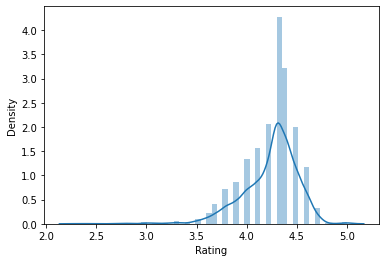

In [ ]:
sns.distplot(df['Rating'])

In [ ]:
#Conclusion
df['Rating'].skew()
#Data is skewed so we will fill using median

-1.2957958663571993

In [ ]:
#Filling value via Median
median_cdi=df['Rating'].median()
df['Rating'].fillna(median_cdi,inplace=True)

In [ ]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

Null values removed, let's start with standardization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv("/content/Flipkart_Mobiles.csv")

# Remove null values
df.dropna(inplace=True)

# Select numeric and categorical columns
num_cols = ['Selling Price', 'Rating']
categorical_cols = ['Brand','Model']



# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ct = ColumnTransformer([('encoder', encoder, categorical_cols)], remainder='passthrough')
df_encoded = ct.fit_transform(df)




/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Remove categorical columns
categorical_cols = ['Brand', 'Model']
df = df.drop(categorical_cols, axis=1)

# Display the updated dataset
print(df.head())


             Color Memory Storage  Rating  Selling Price  Original Price
0  Moonlight Black   4 GB   64 GB     4.5          11990           15990
1       Mint Cream   4 GB   64 GB     4.5          11990           15990
2  Moonlight Black   6 GB  128 GB     4.3          13990           17990
3       Mint Cream   6 GB  128 GB     4.3          13990           17990
4   Electric Black   4 GB   64 GB     4.5          11990           15990


In [ ]:

# Standardize the numerical columns
num_cols = ['Selling Price', 'Rating']

df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the standardized data
print(df.head())

             Color Memory Storage    Rating  Selling Price  Original Price
0  Moonlight Black   4 GB   64 GB  0.948268      -0.481720           15990
1       Mint Cream   4 GB   64 GB  0.948268      -0.481720           15990
2  Moonlight Black   6 GB  128 GB  0.215113      -0.405873           17990
3       Mint Cream   6 GB  128 GB  0.215113      -0.405873           17990
4   Electric Black   4 GB   64 GB  0.948268      -0.481720           15990


Finally, visualization.

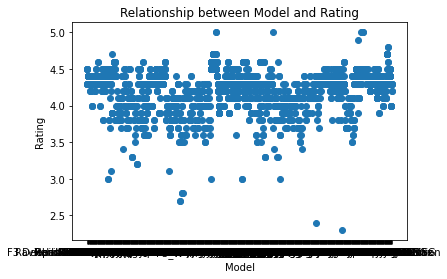

In [ ]:


# Visualize the relationship between 'Model' and 'Rating'
plt.scatter(df['Model'], df['Rating'])
plt.xlabel('Model')
plt.ylabel('Rating')
plt.title('Relationship between Model and Rating')
plt.show()